# **Tugas 5 : Keyword Extraction**

**Nama : Adz Dzikry Pradana Putra-210411100093**

---

In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [297]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [298]:
# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv")
df.head()

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,18 Tim yang Lolos FFWS Global Finals 2024 di B...,Jakarta - Rangkaian pertandingan di FFWS SEA 2...,"Rabu, 16 Okt 2024 19:30 WIB",Games,Jakarta Rangkaian pertandingan di FFWS SEA F...,jakarta rangkaian pertandingan di ffws sea f...,"['jakarta', 'rangkaian', 'pertandingan', 'di',...",jakarta rangkaian pertandingan ffws sea fall s...
1,Ampun Bang Jago! Zuckerberg Klaim Pemain Handa...,"Jakarta - CEO Meta Mark Zuckerberg, cukup perc...","Rabu, 16 Okt 2024 17:50 WIB",Games,Jakarta CEO Meta Mark Zuckerberg cukup percay...,jakarta ceo meta mark zuckerberg cukup percay...,"['jakarta', 'ceo', 'meta', 'mark', 'zuckerberg...",jakarta ceo meta mark zuckerberg percaya kemam...
2,"20 Game Horor Terbaik Tahun 2000an, Udah Perna...",Jakarta - Game horor selalu punya daya tarikny...,"Rabu, 16 Okt 2024 14:20 WIB",Games,Jakarta Game horor selalu punya daya tariknya...,jakarta game horor selalu punya daya tariknya...,"['jakarta', 'game', 'horor', 'selalu', 'punya'...",jakarta game horor daya tariknya penikmatnya b...
3,"Begini Cara Dapat Skin Zhou Yu HOK Gratis, Gam...",Jakarta - Ternyata cara dapat skin Zhou Yu Hon...,"Rabu, 16 Okt 2024 12:15 WIB",Games,Jakarta Ternyata cara dapat skin Zhou Yu Hono...,jakarta ternyata cara dapat skin zhou yu hono...,"['jakarta', 'ternyata', 'cara', 'dapat', 'skin...",jakarta skin zhou yu honor of kings hok gratis...
4,"Gagal Juara FFWS SEA 2024 Fall, Wakil RI: Kita...","Jakarta - Tampil di depan ribuan pendukungnya,...","Selasa, 15 Okt 2024 17:36 WIB",Games,Jakarta Tampil di depan ribuan pendukungnya t...,jakarta tampil di depan ribuan pendukungnya t...,"['jakarta', 'tampil', 'di', 'depan', 'ribuan',...",jakarta tampil ribuan pendukungnya wakil indon...


In [299]:
# mengambil satu sample berita
sample_berita = df['Hasil stopword'].iloc[58]

sample_berita_list = [sample_berita]
print(sample_berita)

paris mantan pesepakbola top raphael varane berterimakasih real madrid varane menilai madrid menangani pemain muda layak ditiru klubklub varane salah pemain muda berhasil melejit madrid varane direkrut los blancos lens usianya menjelma salah bek terbaik generasinya selepas varane hengkang madrid mencetak bintangbintang muda federico valverde vinicius junior rodrygo pemainpemain kunci sukses el real memenangi titel laliga liga champions musim raphael varane kesabaran faktor real madrid mengasah pemainpemain mudanya varane layak diikuti klubklub beruntung bergabung klub pemainpemain muda belajar level matang fisik pemenang piala dunia timnas prancis lakukan bertahuntahun denganku federico valverde vinicius rodrygo klub mestinya meniru real klub memperpanjang sesi latihan pemain kelelahan varane lequipe raphael varane menghabiskan musim madrid penampilan memenangi trofi juara gelar laliga liga champions varane hijrah manchester united pindah como memutuskan gantung sepatu september rinrin

In [300]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,bek,belajar,bergabung,berhasil,bertahuntahun,berterimakasih,beruntung,bintangbintang,blancos,champions,...,terbaik,timnas,titel,top,trofi,united,usianya,valverde,varane,vinicius
0,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.111629,...,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.055815,0.111629,0.558146,0.111629


In [301]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.05 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,bek,belajar,bergabung,berhasil,bertahuntahun,berterimakasih,beruntung,bintangbintang,blancos,champions,...,terbaik,timnas,titel,top,trofi,united,usianya,valverde,varane,vinicius
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [302]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

           Node  Degree Centrality
0           bek                1.0
45      melejit                1.0
65  pesepakbola                1.0
64   penampilan                1.0
63     pemenang                1.0
..          ...                ...
28    kesabaran                1.0
27    kelelahan                1.0
26       junior                1.0
25        juara                1.0
88     vinicius                1.0

[89 rows x 2 columns]


In [303]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)


Top 10 fitur berdasarkan degree centrality:
['bek', 'melejit', 'pesepakbola', 'penampilan', 'pemenang', 'pemainpemain', 'pemain', 'paris', 'musim', 'mudanya']

DataFrame asli dengan semua fitur (tanpa menghapus):
   bek  belajar  bergabung  berhasil  bertahuntahun  berterimakasih  \
0    1        1          1         1              1               1   

   beruntung  bintangbintang  blancos  champions  ...  terbaik  timnas  titel  \
0          1               1        1          1  ...        1       1      1   

   top  trofi  united  usianya  valverde  varane  vinicius  
0    1      1       1        1         1       1         1  

[1 rows x 89 columns]


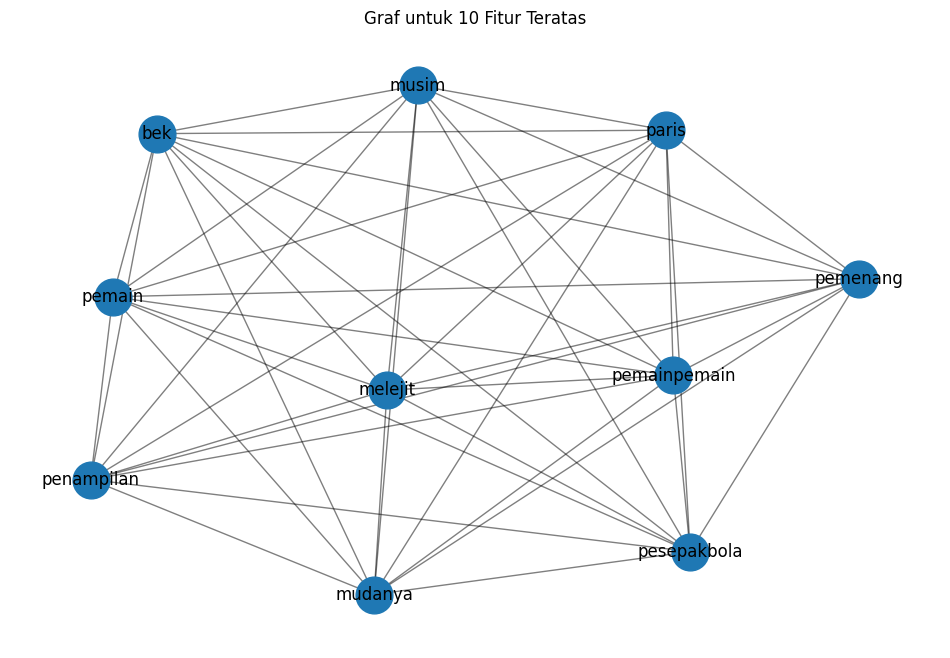

In [304]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [305]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

           Node  Degree Centrality  Closeness Centrality  \
0           bek                1.0                   1.0   
1       melejit                1.0                   1.0   
2   pesepakbola                1.0                   1.0   
3    penampilan                1.0                   1.0   
4      pemenang                1.0                   1.0   
5  pemainpemain                1.0                   1.0   
6        pemain                1.0                   1.0   
7         paris                1.0                   1.0   
8         musim                1.0                   1.0   
9       mudanya                1.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [306]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: bek
